## Dataset:
 - https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data
> The pipeline is a wrapper that executes one or more models within a pass of the cross-validation procedure.

In [1]:
# Binary Classification with Sonar Dataset: Standardized
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataframe = read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer= 'normal' , activation= 'relu' ))
    model.add(Dense(1, kernel_initializer= 'normal' , activation= 'sigmoid' ))
    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
    return model

# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_baseline, nb_epoch=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Standardized: 74.06% (5.22%)


## Smaller Network Topology

Dealing with redundancy
> In this experiment we take our baseline model with 60 neurons in the hidden layer and
reduce it by half to 30. This will put pressure on the network during training to pick out the
most important structure in the input data to model.


```{python}
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=60, init= normal , activation= relu ))
    model.add(Dense(1, init= normal , activation= sigmoid ))
    # Compile model
    model.compile(loss= binary_crossentropy , optimizer= adam , metrics=[ accuracy ])
    return model
```

> We can see that we have a very slight
boost in the mean estimated accuracy

## Greater Network Topology
> A neural network topology with more layers o↵ers more opportunity for the network to extract
key features and recombine them in useful nonlinear ways.

```
# larger model
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, init= normal , activation= relu ))
    model.add(Dense(30, init= normal , activation= relu ))
    model.add(Dense(1, init= normal , activation= sigmoid ))
    # Compile model
    model.compile(
```

## Boston House Price Prediction

> Reasonable performance for models evaluated usingMean Squared Error (MSE)
are around 20 in squared thousands of dollars (or
4,500 if you take the square root).


In [27]:
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from keras import regularizers

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
# load dataset
dataframe = read_csv(url, delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=13, activation= 'relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss= 'mean_squared_error' , optimizer= 'adam' ) #### !!
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -129.20 (77.70) MSE


### Lift Performance By Standardizing The Dataset

In [68]:
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.constraints import maxnorm
from keras.layers import Dropout
from keras.optimizers import SGD

from keras.optimizers import Adam

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
# load dataset
dataframe = read_csv(url, delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=13, kernel_initializer = 'normal' , activation= 'relu', kernel_constraint=maxnorm(1)))
    model.add(Dropout(0.2))
    model.add(Dense(32, kernel_initializer = 'normal' , activation= 'relu',kernel_constraint=maxnorm(1)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer= 'normal' ))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.9, decay=0.1, nesterov=False)
    model.compile(loss= 'mean_squared_error' , optimizer = "sgd") #### !!
    return model

# evaluate model with standardized dataset
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

In [69]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

kfold = KFold(n_splits=2, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: nan (nan) MSE


## Save Model

HDF5

> Hierarchical Data Format or HDF5 for short is a flexible data storage format and is
convenient for storing large arrays of real values

JSON

> JSON is a simple file format for describing data hierarchically. 

In [33]:
!pip install h5py

Save predefiend Model
```
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
```

Later USE

```
# load json and create model
json_file = open( model.json , r )
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
```

Compile and evaluate

```
# evaluate loaded model on test data
loaded_model.compile(loss= binary_crossentropy , optimizer= rmsprop , metrics=[ accuracy ])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
```

## Keep Models with checkpointing

Deep learning models can take hours, days or even weeks to train

> Application checkpointing is a fault tolerance technique for long running processes. You can keep a snapshot of the state of the system when a system failure occurs. 

```
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_acc' , verbose=1, save_best_only=True, mode= max )
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10,
callbacks=callbacks_list, verbose=0)
```

To keep only one file
> changing the output filename to be fixed (not include score or epoch information).

```
# checkpoint
filepath="weights.best.hdf5"
```

The checkpoint only includes the model weights. It assumes you know the network structure.

```
# load weights
model.load_weights("weights.best.hdf5")
```

## History

History callback. It records training metrics for each epoch.

```
# list all data in history
print(history.history.keys())
```

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


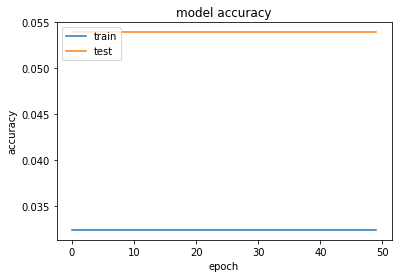

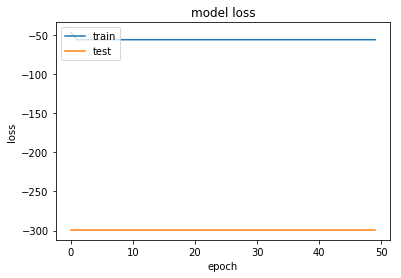

In [49]:
import numpy as np
import pandas as pd
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
data_url = "https://raw.githubusercontent.com/uzay00/KaVe-Egitim/master/DerinOgrenme/Keras-Giris/pima-indians-diabetes.csv" 
data = pd.read_csv(data_url, skiprows=9, header = None)

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(24, input_dim=8, kernel_initializer = 'uniform', activation= 'relu' ))
model.add(Dense(24, kernel_initializer = 'uniform', activation= 'relu' ))
model.add(Dense(1, kernel_initializer = 'uniform',  activation= 'sigmoid' ))
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'sgd' , metrics=[ 'accuracy' ])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train' , 'test' ], loc= 'upper left' )
plt.show()
# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train', 'test' ], loc= 'upper left' )
plt.show()

## Dropout regularization

> You can imagine that if neurons are randomly dropped
out of the network during training, that other neurons will have to step in and handle the
representation required to make predictions for the missing neurons